In [1]:
!python --version

Python 3.10.14


```text
fastmri                   0.3.0
matplotlib                3.8.0
numpy                     1.25.2
torch                     2.0.1
```

In [2]:
from fastmri.data import subsample
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
plt.rcdefaults()
custom_rcParams = {
    'axes.linewidth': 1.6,
    'font.family': ['Arial'],
    'font.size': 20,
    'lines.linewidth': 1.5
}
for k, v in custom_rcParams.items():
    print(f'{k:>16s}: {str(plt.rcParams[k]):>16s} -> {str(v):>16s}')
plt.rcParams.update(custom_rcParams)

  axes.linewidth:              0.8 ->              1.6
     font.family:   ['sans-serif'] ->        ['Arial']
       font.size:             10.0 ->               20
 lines.linewidth:              1.5 ->              1.5


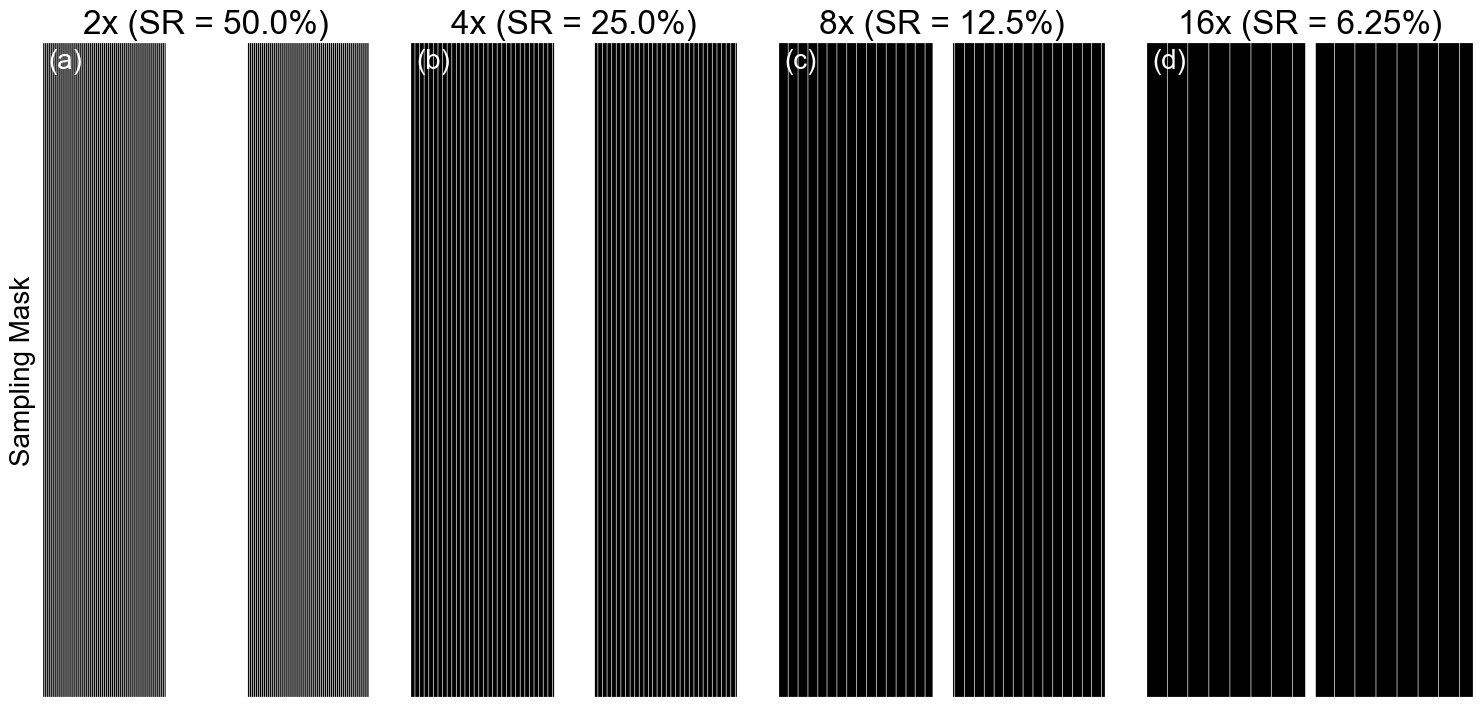

In [4]:
MASKARGS = {
    '2x': {'center_fractions': [0.25], 'accelerations': [2]},
    '4x': {'center_fractions': [0.125], 'accelerations': [4]},
    '8x': {'center_fractions': [0.0625], 'accelerations': [8]},
    '16x': {'center_fractions': [0.03125], 'accelerations': [16]}
}

fig, axs = plt.subplots(1, 4, figsize=(15, 10))
fig.tight_layout(pad=0, w_pad=-1)
for i, acc in enumerate(['2x', '4x', '8x', '16x']):
    center_mask, accel_mask, num_low_frequencies = subsample.EquispacedMaskFractionFunc(
        **MASKARGS[acc]
    ).sample_mask(shape=(500, 1), offset=0)
    mask = torch.max(center_mask, accel_mask).squeeze().numpy()[np.newaxis, :]
    mask = mask * np.ones((1000, 500))

    axs[i].imshow(mask, cmap='gray')
    axs[i].set_title(f'{acc} (SR = {1/2**(i+1)*100}%)')
    axs[i].tick_params(left=False, right=False,
                       labelleft=False, labelbottom=False, bottom=False)
    for spine in axs[i].spines.values():
        spine.set_edgecolor('white')
axs[0].set_ylabel('Sampling Mask')
axs[0].text(10, 40, '(a)', color='white')
axs[1].text(10, 40, '(b)', color='white')
axs[2].text(10, 40, '(c)', color='white')
axs[3].text(10, 40, '(d)', color='white')

# save
fig.savefig('output.png', transparent=True,
            bbox_inches='tight', pad_inches=.1, dpi=200)